# Part A

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns
import io

In [4]:
# import and read data 
c = pd.read_csv('Company_data.csv')
c

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
#To find whether there are any existing null values or not
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
#Count of duplicated rows
c[c.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


<AxesSubplot:>

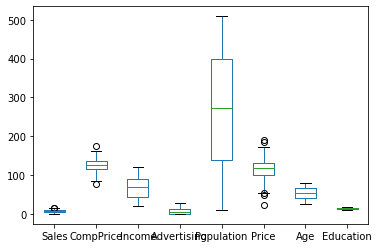

In [7]:
#Outlier Detection
c.plot(kind='box')

<AxesSubplot:>

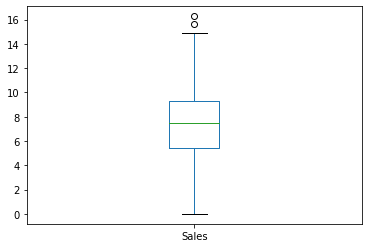

In [8]:
c.Sales.plot(kind='box')

In [9]:
c.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [10]:
IQR = 9.320000 - 5.390000
IQR

3.9300000000000006

In [11]:
#Calculation of upper fence
upper_fence = 9.320000 + (1.5*IQR)
upper_fence

15.215000000000002

In [12]:
index=c[c.Sales>15.215000000000002].index
c = c.drop(index,axis=0)

<AxesSubplot:>

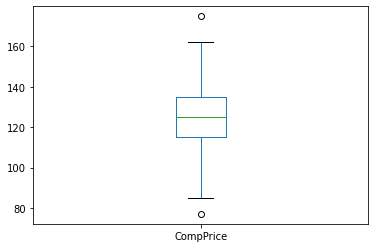

In [13]:
c.CompPrice.plot(kind='box')

In [14]:
c.CompPrice.describe()

count    398.000000
mean     124.942211
std       15.351275
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

In [15]:
IQR = 135.000000 - 115.000000
IQR

20.0

In [16]:
#Calculation of upper fence
upper_fence = 135.000000 + (1.5*IQR)
upper_fence

165.0

In [17]:
index=c[c.Sales>165.0].index
c = c.drop(index,axis=0)

<AxesSubplot:>

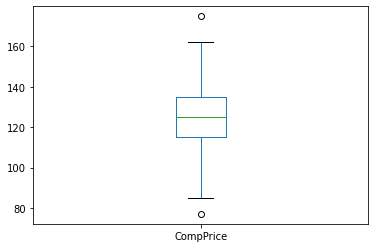

In [18]:
c.CompPrice.plot(kind='box')

<AxesSubplot:>

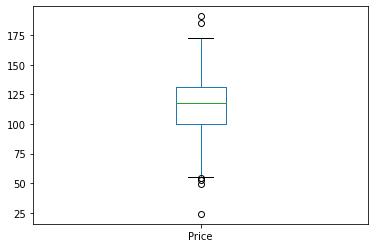

In [19]:
c.Price.plot(kind='box')

In [20]:
c.Price.describe()

count    398.000000
mean     115.964824
std       23.603436
min       24.000000
25%      100.250000
50%      117.500000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

In [21]:
IQR = 131.000000 - 100.250000
IQR

30.75

In [22]:
#Calculation of upper fence
upper_fence = 131.000000 + (1.5*IQR)
upper_fence

177.125

In [23]:
index=c[c.Sales>177.125].index
c = c.drop(index,axis=0)

<AxesSubplot:>

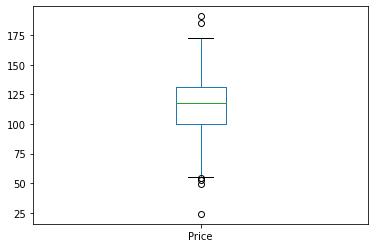

In [24]:
c.Price.plot(kind='box')

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

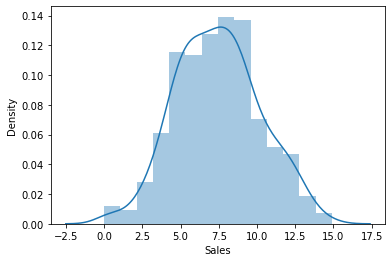

In [25]:
#To check whether the distribution is normal
sns.distplot(c['Sales'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompPrice', ylabel='Density'>

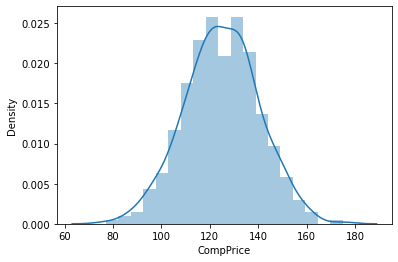

In [26]:
sns.distplot(c['CompPrice'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

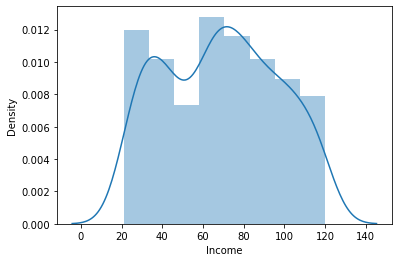

In [27]:
sns.distplot(c['Income'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Advertising', ylabel='Density'>

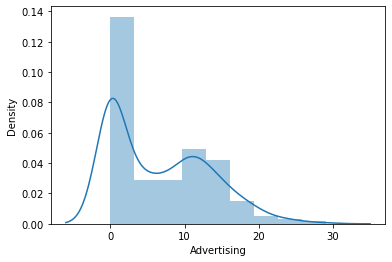

In [28]:
sns.distplot(c['Advertising'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

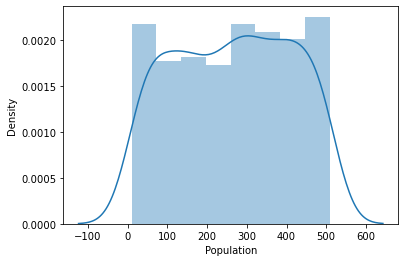

In [29]:
sns.distplot(c['Population'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

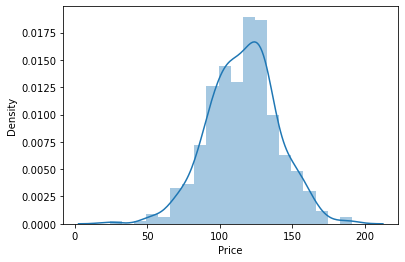

In [30]:
sns.distplot(c['Price'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

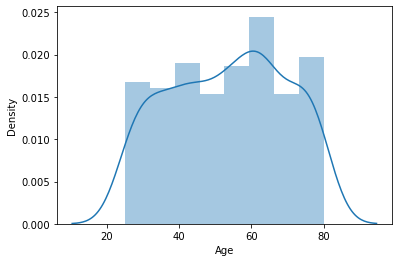

In [31]:
sns.distplot(c['Age'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Education', ylabel='Density'>

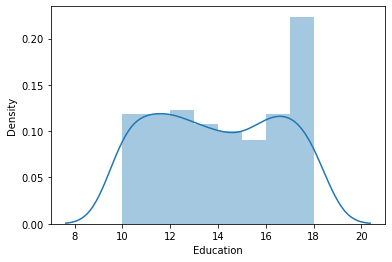

In [32]:
sns.distplot(c['Education'])

In [33]:
c1= c.drop(['ShelveLoc'],axis=1)
c1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,Yes,Yes
1,11.22,111,48,16,260,83,65,10,Yes,Yes
2,10.06,113,35,10,269,80,59,12,Yes,Yes
3,7.40,117,100,4,466,97,55,14,Yes,Yes
4,4.15,141,64,3,340,128,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,Yes,Yes
396,6.14,139,23,3,37,120,55,11,No,Yes
397,7.41,162,26,12,368,159,40,18,Yes,Yes
398,5.94,100,79,7,284,95,50,12,Yes,Yes


In [34]:
ShelveLoc = c["ShelveLoc"]
c1 = pd.concat([c1,ShelveLoc], axis = 1)
c1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc
0,9.50,138,73,11,276,120,42,17,Yes,Yes,Bad
1,11.22,111,48,16,260,83,65,10,Yes,Yes,Good
2,10.06,113,35,10,269,80,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,38,13,Yes,No,Bad
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,Yes,Yes,Good
396,6.14,139,23,3,37,120,55,11,No,Yes,Medium
397,7.41,162,26,12,368,159,40,18,Yes,Yes,Medium
398,5.94,100,79,7,284,95,50,12,Yes,Yes,Bad


In [35]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
c1['ShelveLoc']= label_encoder.fit_transform(c1['ShelveLoc']) 

In [36]:
#Converting the categorical data to Binary data
c1['Urban'] = c1['Urban'].astype('category').cat.codes
c1['US'] = c1['US'].astype('category').cat.codes
c1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc
0,9.50,138,73,11,276,120,42,17,1,1,0
1,11.22,111,48,16,260,83,65,10,1,1,1
2,10.06,113,35,10,269,80,59,12,1,1,2
3,7.40,117,100,4,466,97,55,14,1,1,2
4,4.15,141,64,3,340,128,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,1
396,6.14,139,23,3,37,120,55,11,0,1,2
397,7.41,162,26,12,368,159,40,18,1,1,2
398,5.94,100,79,7,284,95,50,12,1,1,0


In [37]:
x=c1.iloc[:,0:10]
y=c1['ShelveLoc']

In [38]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


In [39]:
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 398, dtype: int32

In [40]:
c1['ShelveLoc'].unique()

array([0, 1, 2])

In [41]:
c1.ShelveLoc.value_counts()

2    219
0     96
1     83
Name: ShelveLoc, dtype: int64

In [42]:
colnames = list(c1.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban',
 'US',
 'ShelveLoc']

In [43]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

# Building Decision Tree Classifier using Entropy Criteria

In [44]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

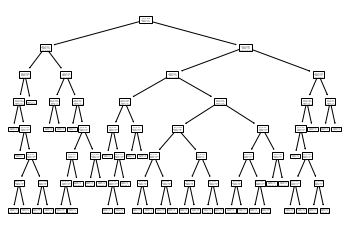

In [45]:
#PLot the decision tree
tree.plot_tree(model);

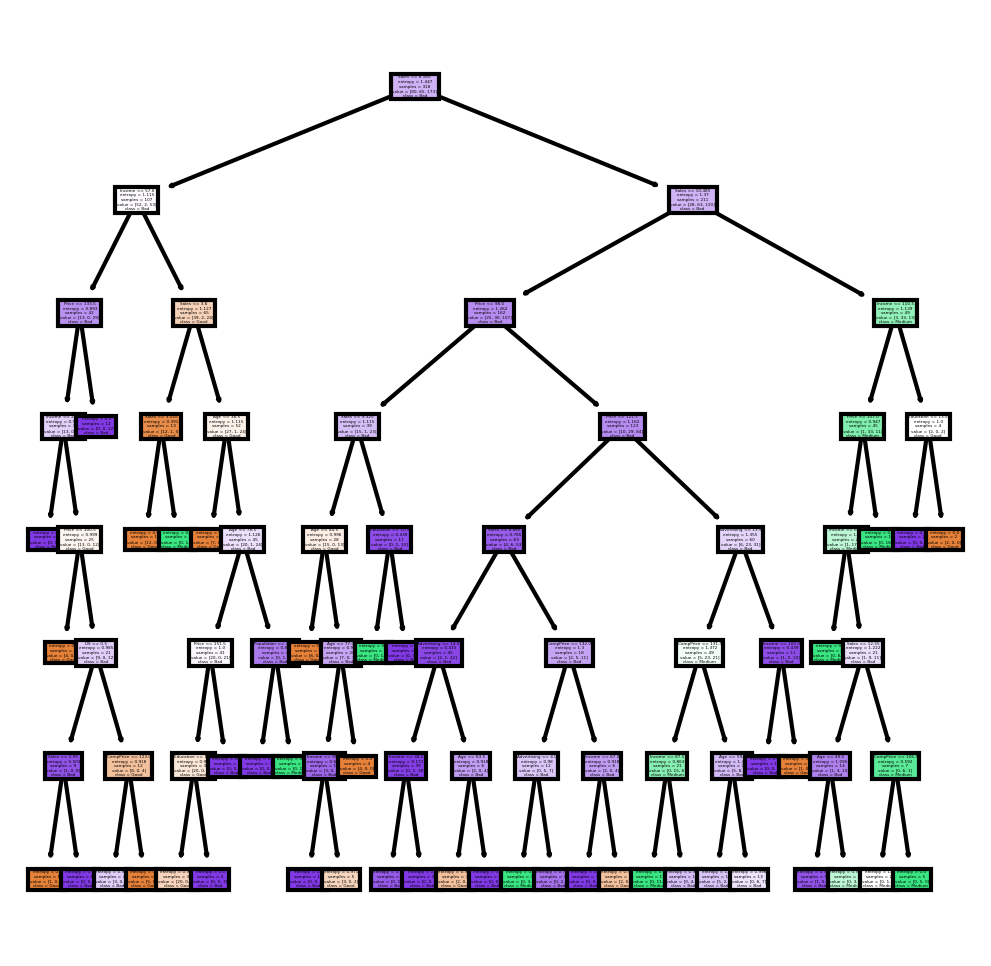

In [46]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban','US']
cn=['Good', 'Medium', 'Bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [47]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    45
0    24
1    11
dtype: int64

In [48]:
preds

array([2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2,
       1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2])

In [49]:
x_test

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
10,9.01,121,78,9,150,100,26,10,0,1
261,5.71,121,42,4,188,118,54,15,1,1
355,7.02,130,100,0,306,146,42,11,1,0
277,7.80,136,48,12,326,125,36,16,1,1
17,12.29,147,74,13,251,131,52,10,1,1
...,...,...,...,...,...,...,...,...,...,...
373,5.58,137,71,0,402,116,78,17,1,0
377,6.81,132,61,0,263,125,41,12,0,0
372,7.80,121,50,0,508,98,65,11,0,0
28,2.99,103,74,0,359,97,55,11,1,1


In [50]:
y_test

10     0
261    2
355    1
277    2
17     1
      ..
373    2
377    2
372    2
28     0
295    2
Name: ShelveLoc, Length: 80, dtype: int32

In [51]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
ShelveLoc,,,
0,12,0,4
1,2,8,8
2,10,3,33


In [52]:
# Accuracy 
np.mean(preds==y_test)

0.6625

In [53]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60        16
           1       0.73      0.44      0.55        18
           2       0.73      0.72      0.73        46

    accuracy                           0.66        80
   macro avg       0.65      0.64      0.63        80
weighted avg       0.69      0.66      0.66        80



# Building Decision Tree Classifier (CART) using Gini Criteria

In [54]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=7)

In [55]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [56]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.6625

# Decision Tree Regression Example

In [57]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [58]:
c1= c1.drop(['Price'],axis=1)
c1

,Sales,CompPrice,Income,Advertising,Population,Age,Education,Urban,US,ShelveLoc
0,9.50,138,73,11,276,42,17,1,1,0
1,11.22,111,48,16,260,65,10,1,1,1
2,10.06,113,35,10,269,59,12,1,1,2
3,7.40,117,100,4,466,55,14,1,1,2
4,4.15,141,64,3,340,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,33,14,1,1,1
396,6.14,139,23,3,37,55,11,0,1,2
397,7.41,162,26,12,368,40,18,1,1,2
398,5.94,100,79,7,284,50,12,1,1,0


In [59]:
c1 = c1.iloc[:,0:7]
c1

,Sales,CompPrice,Income,Advertising,Population,Age,Education
0,9.50,138,73,11,276,42,17
1,11.22,111,48,16,260,65,10
2,10.06,113,35,10,269,59,12
3,7.40,117,100,4,466,55,14
4,4.15,141,64,3,340,38,13
...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,33,14
396,6.14,139,23,3,37,55,11
397,7.41,162,26,12,368,40,18
398,5.94,100,79,7,284,50,12


In [60]:
Price = c["Price"]
c1 = pd.concat([c1,Price], axis = 1)
c1

,Sales,CompPrice,Income,Advertising,Population,Age,Education,Price
0,9.50,138,73,11,276,42,17,120
1,11.22,111,48,16,260,65,10,83
2,10.06,113,35,10,269,59,12,80
3,7.40,117,100,4,466,55,14,97
4,4.15,141,64,3,340,38,13,128
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,33,14,128
396,6.14,139,23,3,37,55,11,120
397,7.41,162,26,12,368,40,18,159
398,5.94,100,79,7,284,50,12,95


In [61]:
array = c1.values
X = array[:,0:7]
Y= array[:,7]
Y

array([120.,  83.,  80.,  97., 128.,  72., 108., 120., 124., 124., 100.,
        94., 136.,  86., 118., 144., 110., 131.,  68., 121., 131., 109.,
       138., 109., 113.,  82., 131., 107.,  97., 102.,  89., 131., 137.,
       128., 128.,  96., 100., 110., 102., 138., 126., 124.,  24., 134.,
        95., 135.,  70., 108.,  98., 149., 108., 108., 129., 119., 144.,
       154.,  84., 117., 103., 114., 123., 107., 133., 101., 104., 128.,
        91., 115., 134.,  99.,  99., 150., 116., 104., 136.,  92.,  70.,
        89., 145.,  90.,  79., 128., 139.,  94., 121., 112., 134., 126.,
       111., 119., 103., 107., 125., 104.,  84., 148., 132., 129., 127.,
       107., 106., 118.,  97.,  96., 138.,  97., 139., 108., 103.,  90.,
       116., 151., 125., 127., 106., 129., 128., 119.,  99., 128., 131.,
        87., 108., 155., 120.,  49., 133., 116., 126., 147.,  77.,  94.,
       136.,  97., 131., 120., 120., 118., 109.,  94., 129., 131., 104.,
       159., 123., 117., 131., 119.,  97.,  87., 11

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=75)

In [63]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [64]:
#Find the accuracy
model.score(X_test,Y_test)

0.17609373907695447

# Part B

In [65]:
# import and read data 
f = pd.read_csv('Fraud_check.csv')
f

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [66]:
#To find whether there are any existing null values or not
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [67]:
#Count of duplicated rows
f[f.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


<AxesSubplot:>

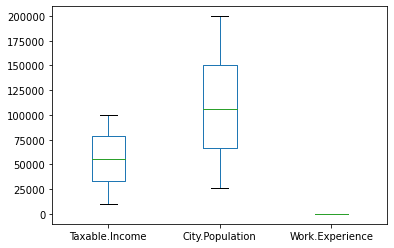

In [68]:
#Outlier Detection
f.plot(kind='box')

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

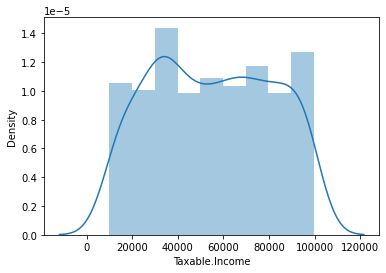

In [69]:
sns.distplot(f['Taxable.Income'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City.Population', ylabel='Density'>

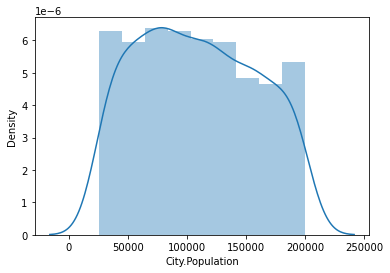

In [70]:
sns.distplot(f['City.Population'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

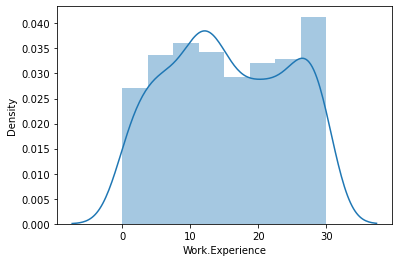

In [71]:
sns.distplot(f['Work.Experience'])

In [72]:
TaxableIncome = f['Taxable.Income']
TaxableIncome

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [73]:
f.loc[f['Taxable.Income'] <= 30000, 'Target'] = 'Risky'
f.loc[f['Taxable.Income'] > 30000, 'Target'] = 'Good'
f.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [74]:
#Converting the categorical data to Binary data
f['Undergrad'] = f['Undergrad'].astype('category').cat.codes
f['Marital.Status'] = f['Marital.Status'].astype('category').cat.codes
f['Urban'] = f['Urban'].astype('category').cat.codes
f['Target'] = f['Target'].astype('category').cat.codes
f

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [75]:
#Complete Fraud dataset
label_encoder = preprocessing.LabelEncoder()
f['Target']= label_encoder.fit_transform(f['Target']) 

In [76]:
x=f.iloc[:,0:6]
y=f['Target']

In [77]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [78]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Target, Length: 600, dtype: int64

In [79]:
f['Target'].unique()

array([0, 1], dtype=int64)

In [80]:
f.Target.value_counts()

0    476
1    124
Name: Target, dtype: int64

In [81]:
colnames = list(f.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Target']

In [82]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

# Building Decision Tree Classifier using Entropy Criteria

In [83]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

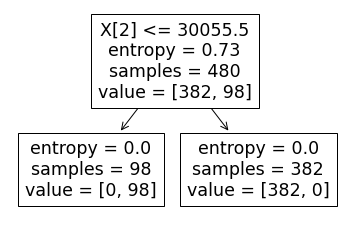

In [84]:
#PLot the decision tree
tree.plot_tree(model);

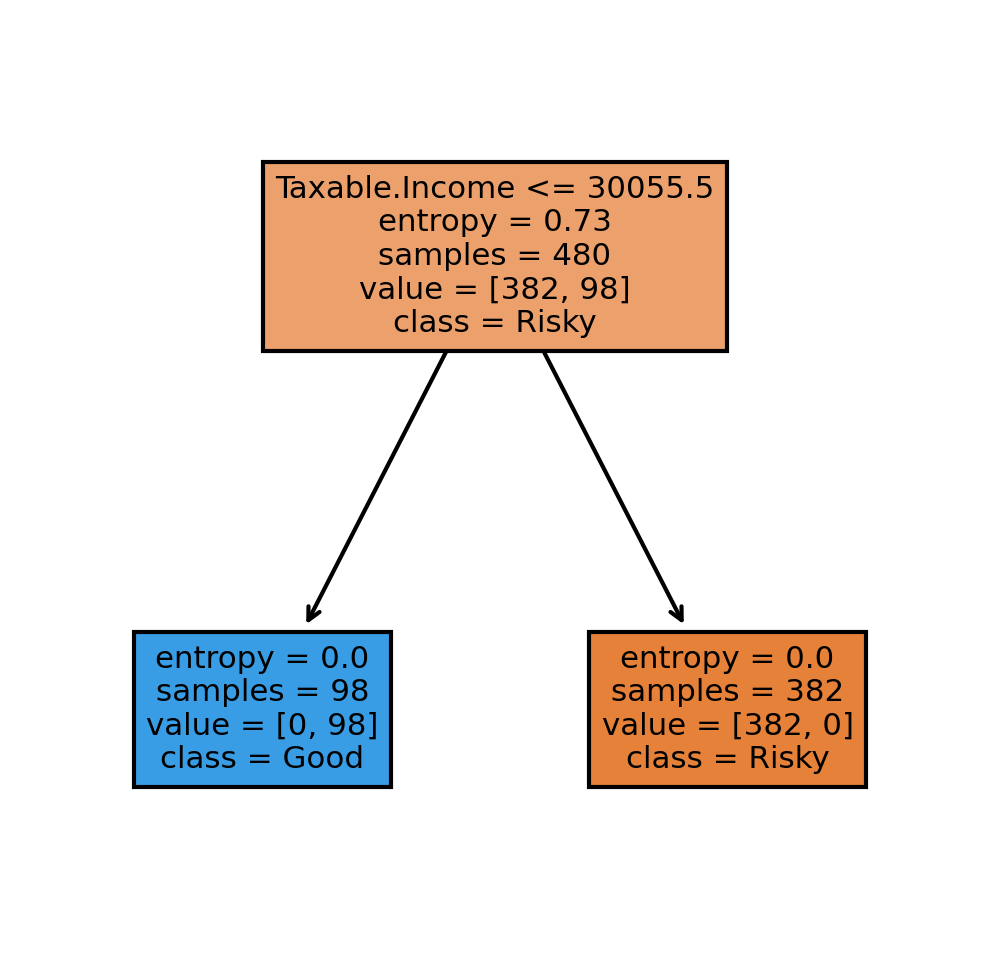

In [85]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [86]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    94
1    26
dtype: int64

In [87]:
preds

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [88]:
x_test

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
493,0,1,17183,103226,29,0
172,0,1,13068,52819,23,1
352,0,0,15627,72115,16,1
506,0,2,23884,111105,8,1
595,1,0,76340,39492,7,1
...,...,...,...,...,...,...
536,0,2,40674,157025,14,0
422,0,0,99311,191983,14,1
191,0,2,70819,176341,7,1
21,1,0,14310,29106,7,1


In [89]:
y_test

493    1
172    1
352    1
506    1
595    0
      ..
536    0
422    0
191    0
21     1
105    0
Name: Target, Length: 120, dtype: int64

In [90]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Target,,
0,94,0
1,0,26


In [91]:
# Accuracy 
np.mean(preds==y_test)

1.0

In [92]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# Building Decision Tree Classifier (CART) using Gini Criteria

In [93]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [94]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [95]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

# Decision Tree Regression Example

In [96]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [97]:
array = f.values
X = array[:,0:6]
Y= array[:,6]
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [99]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [100]:
#Find the accuracy
model.score(X_test,Y_test)

1.0